In [41]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Analyze survival of changed lines

For each commit in commit sharings in the DevGPT dataset, compute how many of changed lines (post-image lines, i.e. added lines in unified diff) survived to present, that is to `HEAD` revision.

The calculations were done using the [`compute_changes_survival.py`](../src/data/compute_changes_survival.py) script.

Below there is result of running this script (excerpt):
```
$ python src/data/compute_changes_survival.py \
    data/interim/commit_sharings_df.csv data/repositories_download_status.json \
    data/interim/commit_sharings_changes_survival_df.csv
Start time: 2023-11-18 18:06:07.674237 ==============================
Reading commit sharings data from 'data/interim/commit_sharings_df.csv'...
Loading info about cloned repos from 'data/repositories_download_status.json'...
Processing (694, 18) commit sharings data...
[...]
commit: 694it [01:29,  7.76it/s]
Skipped 5 rows because of an error
Created 76 of GitRepo objects
Lines survival stats: {'lines_survived_sum': 130298, 'lines_total_sum': 169469}
  76.89% lines survived
Creating dataframe with augmentation data from 689 records...
Merging (694, 18) with (689, 7) dataframes on 'Sha'...
Writing (691, 24) of augmented commit sharings data
  to 'data/interim/commit_sharings_changes_survival_df.csv'
End time: 2023-11-18 18:07:37.165358 ================================
Function main() {} took 89.4911 seconds = 0:01:29.491089
```

In [2]:
df = pd.read_csv('../data/interim/commit_sharings_changes_survival_df.csv')

In [3]:
df.columns

Index(['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Sha', 'Message',
       'AuthorAt', 'CommitAt', 'NumberOfChatgptSharings',
       'TotalNumberOfPrompts', 'TotalTokensOfPrompts', 'TotalTokensOfAnswers',
       'NumberOfConversations', 'ModelGPT4', 'ModelGPT3_5', 'ModelOther',
       'Status404', 'author_timestamp', 'committer_timestamp',
       'is_merged_HEAD', 'error', 'change_lines_survived',
       'change_lines_total'],
      dtype='object')

In [30]:
df['RepoName'].value_counts()

RepoName
tisztamo/Junior                          575
pbrudny/jobsforit-de                      16
hoshotakamoto/banzukesurfing              15
kevinveenbirkenbach/computer-playbook      4
bh679/MindfulAI2.0                         4
                                        ... 
larrywright/larrywright.me                 1
REReal8/CCWorldPlatform                    1
saimonmoore/jira-tools                     1
aifenxiang19/AIChat                        1
openai/evals                               1
Name: count, Length: 76, dtype: int64

In [31]:
df['RepoLanguage'].value_counts()

RepoLanguage
CSS                 614
HTML                 19
Python               14
Dockerfile            8
JavaScript            6
Shell                 5
C                     4
Cython                4
Batchfile             3
Java                  2
Lua                   2
Jinja                 1
C#                    1
Jupyter Notebook      1
Pascal                1
Go                    1
EJS                   1
GAML                  1
Name: count, dtype: int64

In [7]:
df_sel = df[[
    'RepoName', 'RepoLanguage', 'URL', 'Sha',
    'is_merged_HEAD', 'error', 'change_lines_survived', 'change_lines_total',
]]
df_sel

,RepoName,RepoLanguage,URL,Sha,is_merged_HEAD,error,change_lines_survived,change_lines_total
0,grnpin/textbox,HTML,https://github.com/grnpin/textbox/commit/fa335...,fa335cf2ec447d00f8e94b54a8b463725b92947c,True,False,0.0,13.0
1,grnpin/textbox,HTML,https://github.com/grnpin/textbox/commit/0dfc4...,0dfc4385b723060e1e6a21da17a952bd908084ff,True,False,2.0,119.0
2,grnpin/textbox,HTML,https://github.com/grnpin/textbox/commit/811d0...,811d09acdca361c81281c7d71587ebdbd8437453,True,False,3.0,35.0
3,bh679/MindfulAI2.0,CSS,https://github.com/bh679/MindfulAI2.0/commit/e...,e4a8c0fe3adfefb5922315c5b9df3c9cc4c0cff6,True,False,1.0,1.0
4,4lejandrito/fetchbook,JavaScript,https://github.com/4lejandrito/fetchbook/commi...,11725c1a23503f31f7b7cd13188c8d9e30e822a9,True,False,89.0,129.0
...,...,...,...,...,...,...,...,...
691,hoshotakamoto/banzukesurfing,HTML,https://github.com/hoshotakamoto/banzukesurfin...,d0a54935a6e665bfaaa858adb6afc42b231707fe,True,False,16.0,42.0
692,hoshotakamoto/banzukesurfing,HTML,https://github.com/hoshotakamoto/banzukesurfin...,90e1d68ddc8d3a2caa076ee4d423484bf0a742f3,True,False,11.0,33.0
693,hoshotakamoto/banzukesurfing,HTML,https://github.com/hoshotakamoto/banzukesurfin...,63b2ab90b0b138e509e87efad59fd72b414d0133,True,False,27.0,106.0
694,openai/evals,JavaScript,https://github.com/openai/evals/commit/771dce8...,771dce83870cb2e6ab6e99b1c96682de5658c210,True,False,12.0,12.0


In [33]:
df_sel[['is_merged_HEAD', 'error']].describe()

,is_merged_HEAD,error
count,691,691
unique,1,1
top,True,False
freq,691,691


This means that the script didn't add those 5 cases where there was an error

In [15]:
df_sel.loc[:,'change_lines_survived_perc'] = 100.0*df_sel['change_lines_survived']/df_sel['change_lines_total']

In [16]:
df_sel.describe()

,change_lines_survived,change_lines_total,change_lines_survived_perc
count,691.000000,691.000000,688.000000
mean,188.920405,245.610709,50.418306
std,2955.876717,2966.866913,44.196029
min,0.000000,0.000000,0.000000
25%,2.000000,41.000000,4.894180
50%,18.000000,79.000000,33.333333
75%,76.500000,129.500000,98.048643
max,77301.000000,77344.000000,100.000000


In [11]:
s_change_lines_sum = df_sel[['change_lines_survived', 'change_lines_total']].sum()
s_change_lines_sum

change_lines_survived    130544.0
change_lines_total       169717.0
dtype: float64

In [12]:
s_change_lines_sum['change_lines_survived']/s_change_lines_sum['change_lines_total']

0.769186351396737

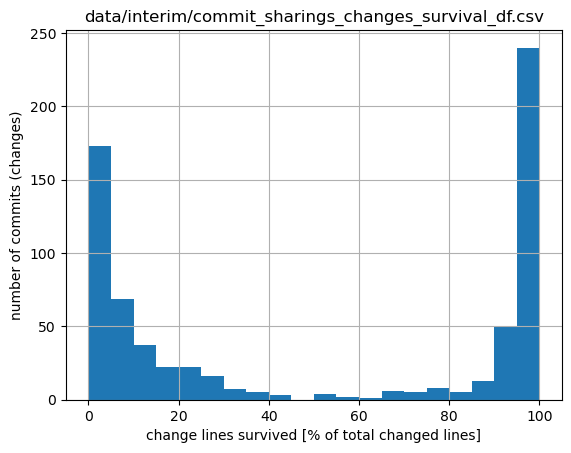

In [39]:
fig, ax = plt.subplots()
df_sel['change_lines_survived_perc'].hist(ax=ax, bins=20)
ax.set_xlabel('change lines survived [% of total changed lines]')
ax.set_ylabel('number of commits (changes)')
ax.set_title('data/interim/commit_sharings_changes_survival_df.csv')

plt.show()

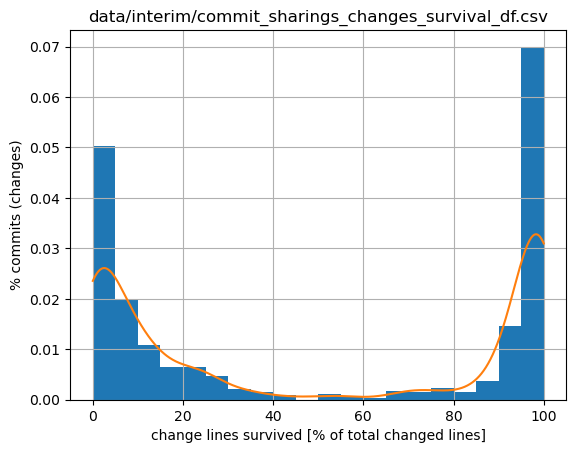

In [55]:
fig, ax = plt.subplots()

df_sel['change_lines_survived_perc'].hist(ax=ax, bins=20, density=True, grid=True)
df_sel['change_lines_survived_perc'].plot.kde(bw_method=0.1, ind=np.linspace(0, 100, num=1000, endpoint=True), grid=True)

ax.set_xlabel('change lines survived [% of total changed lines]')
ax.set_ylabel('% commits (changes)')
ax.set_title('data/interim/commit_sharings_changes_survival_df.csv')

plt.show()

/tmp/ipykernel_1120371/110446166.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_sel[['change_lines_survived', 'change_lines_total']].hist(ax=ax, range=(0,300), density=True)


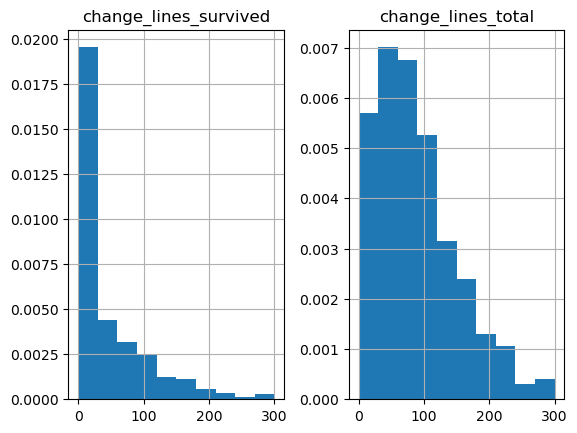

In [29]:
fig, ax = plt.subplots()
df_sel[['change_lines_survived', 'change_lines_total']].hist(ax=ax, range=(0,300), density=True)
ax.set_xlabel('change lines (cut off)')
ax.set_ylabel('% number of commits')
ax.set_title('data/interim/commit_sharings_changes_survival_df.csv')

plt.show()

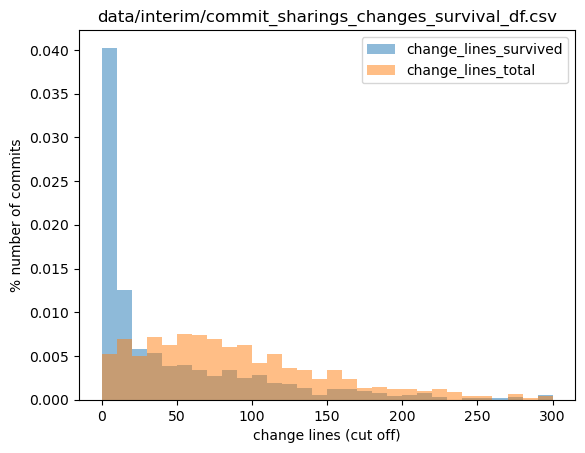

In [37]:
ax = df_sel[['change_lines_survived', 'change_lines_total']].plot.hist(bins=30, alpha=0.5, range=(0,300), density=True)
ax.set_xlabel('change lines (cut off)')
ax.set_ylabel('% number of commits')
ax.set_title('data/interim/commit_sharings_changes_survival_df.csv')

plt.show()

## With outlier tisztamo/Junior repo removed

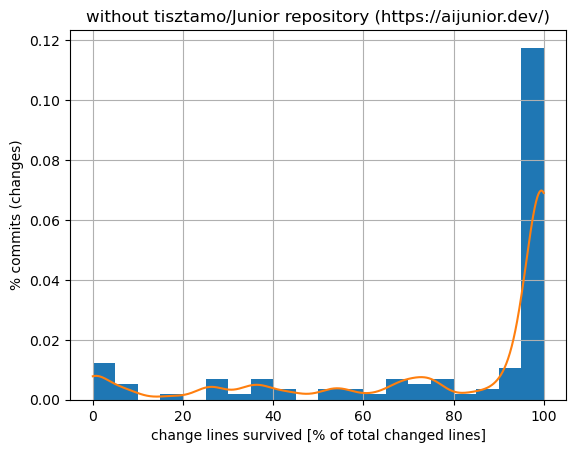

In [56]:
fig, ax = plt.subplots()

df_subsel = df_sel[df_sel['RepoName'] != 'tisztamo/Junior']

df_subsel['change_lines_survived_perc'].hist(ax=ax, bins=20, density=True, grid=True)
df_subsel['change_lines_survived_perc'].plot.kde(bw_method=0.1, ind=np.linspace(0, 100, num=1000, endpoint=True), grid=True)

ax.set_xlabel('change lines survived [% of total changed lines]')
ax.set_ylabel('% commits (changes)')
ax.set_title('without tisztamo/Junior repository (https://aijunior.dev/)')

plt.show()

In [57]:
df_subsel.describe()

,change_lines_survived,change_lines_total,change_lines_survived_perc
count,117.000000,117.000000,114.000000
mean,772.307692,804.769231,78.596199
std,7152.919448,7159.427417,32.436033
min,0.000000,0.000000,0.000000
25%,10.000000,14.000000,67.248062
50%,27.000000,39.000000,98.453966
75%,87.000000,114.000000,100.000000
max,77301.000000,77344.000000,100.000000


In [58]:
s_subsel_sum = df_subsel[['change_lines_survived', 'change_lines_total']].sum()
s_subsel_sum

change_lines_survived    90360.0
change_lines_total       94158.0
dtype: float64

In [61]:
print("Change lines that survived, as totals of all change lines")
print(f"{100.0*s_subsel_sum['change_lines_survived']/s_subsel_sum['change_lines_total']} % (without tisztamo/Junior)")
print(f"{100.0*s_change_lines_sum['change_lines_survived']/s_change_lines_sum['change_lines_total']} % (all)")

Change lines that survived, as totals of all change lines
95.96635442554005 % (without tisztamo/Junior)
76.9186351396737 % (all)
